In [31]:
#importing require python classes and packages
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pickle

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential, load_model
from keras.layers import Dense, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Activation, RepeatVector
from keras.layers import LSTM #class for LSTM training
import os
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers import Bidirectional, GRU #class for bidirectional LSTM as BILSTM and GRU
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score
import pickle
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut #class to calculate LOSO
from sklearn.model_selection import cross_val_score

In [32]:
#use to scale or normalize dataset values
scaler = MinMaxScaler((0,1))

In [33]:
#load and display dataset values
dataset = pd.read_csv("Dataset/BioVid_coords.csv")
dataset.fillna(0, inplace = True)
dataset

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,Label
0,0.0,169.0,133.0,169.0,146.0,171.0,160.0,173.0,172.0,177.0,...,228.0,183.0,238.0,183.0,228.0,183.0,223.0,184.0,218.0,0
1,0.0,169.0,131.0,170.0,145.0,171.0,158.0,173.0,171.0,177.0,...,228.0,183.0,238.0,184.0,228.0,184.0,223.0,185.0,218.0,0
2,0.0,170.0,132.0,170.0,145.0,172.0,158.0,173.0,171.0,177.0,...,228.0,182.0,238.0,184.0,228.0,187.0,223.0,187.0,218.0,0
3,0.0,170.0,131.0,170.0,145.0,172.0,158.0,174.0,172.0,178.0,...,228.0,182.0,238.0,184.0,228.0,187.0,223.0,187.0,218.0,0
4,0.0,169.0,131.0,170.0,145.0,172.0,158.0,174.0,171.0,177.0,...,228.0,183.0,237.0,184.0,228.0,186.0,223.0,187.0,218.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,57.0,170.0,136.0,170.0,149.0,172.0,162.0,173.0,174.0,176.0,...,225.0,189.0,234.0,190.0,224.0,189.0,219.0,189.0,215.0,3
8000,57.0,171.0,135.0,171.0,148.0,172.0,161.0,174.0,174.0,176.0,...,224.0,189.0,234.0,190.0,224.0,189.0,219.0,189.0,215.0,3
8001,57.0,171.0,135.0,171.0,148.0,172.0,161.0,174.0,174.0,176.0,...,225.0,189.0,234.0,190.0,224.0,189.0,219.0,189.0,215.0,3
8002,57.0,171.0,136.0,171.0,149.0,172.0,162.0,173.0,174.0,176.0,...,224.0,189.0,234.0,190.0,224.0,189.0,219.0,189.0,215.0,3


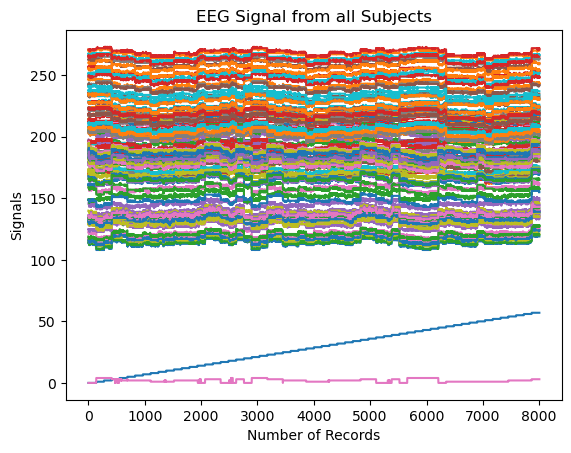

In [34]:
data = dataset.values
plt.plot(data) 
plt.xlabel("Number of Records")
plt.ylabel("Signals")
plt.title("EEG Signal from all Subjects")
plt.show()

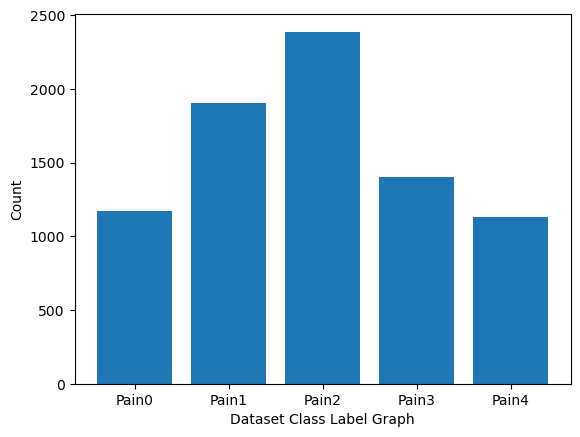

In [35]:
#plot labels in dataset
labels, count = np.unique(dataset['Label'], return_counts = True)
labels = ["Pain0", "Pain1", "Pain2" ,"Pain3", "Pain4"]
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Dataset Class Label Graph")
plt.ylabel("Count")
plt.show()

In [36]:
#code to extract X training features and Y label from dataset and then normalize and shuffle dataset values
dataset = dataset.values
X = dataset[:,0:dataset.shape[1]-1] #extract training features as X
Y = dataset[:,dataset.shape[1]-1] #extract target pain label
X = scaler.fit_transform(X)#normalized features
indices = np.arange(X.shape[0])
np.random.shuffle(indices) #shuffle the dataset values
X = X[indices]
Y = Y[indices]
print("Normalized Training Features : "+str(X))

Normalized Training Features : [[0.56140351 0.54545455 0.63636364 ... 0.5        0.38461538 0.58333333]
 [0.15789474 0.27272727 0.54545455 ... 0.33333333 0.23076923 0.33333333]
 [0.01754386 0.81818182 0.18181818 ... 1.         0.07692308 1.        ]
 ...
 [0.89473684 0.         0.54545455 ... 0.08333333 0.38461538 0.08333333]
 [0.10526316 0.45454545 0.27272727 ... 0.33333333 0.30769231 0.33333333]
 [1.         0.90909091 0.81818182 ... 0.66666667 0.92307692 0.66666667]]


In [37]:
#split dataset into train and test where 80% dataset is for training and 20 for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split dataset into train and test
print()
print("Dataset train & test split as 80% dataset for training and 20% for testing")
print("Training Size (80%): "+str(X_train.shape[0])) #print training and test size
print("Testing Size (20%): "+str(X_test.shape[0]))
print()


Dataset train & test split as 80% dataset for training and 20% for testing
Training Size (80%): 6403
Testing Size (20%): 1601



In [38]:
#define global variables to calculate and store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []
loso = []

In [39]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY, loso_value):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100     
    print()
    print(algorithm+' Accuracy  : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FMeasure    : '+str(f))  
    print(algorithm+' LOSO        : '+str(loso_value))
    loso.append(loso_value)
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Existing Random Forest Accuracy  : 54.02873204247346
Existing Random Forest Precision   : 27.590066544912574
Existing Random Forest Recall      : 39.75103734439834
Existing Random Forest FMeasure    : 31.126559628590773
Existing Random Forest LOSO        : 0.5409119300437226


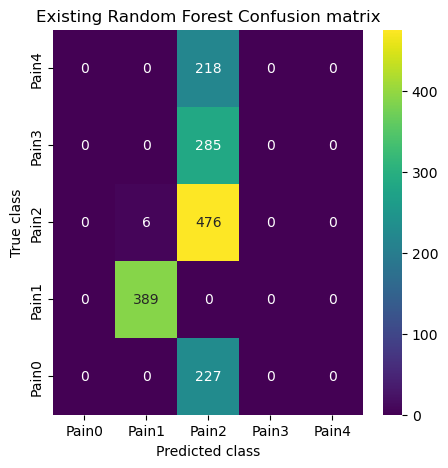

In [40]:
#train existing Random Forest algorithm and then calculate LOSO and other metrics
rf = RandomForestClassifier(ccp_alpha=0.2)
rf.fit(X_train, y_train)#train random forest algorithm
predict = rf.predict(X_test)#perform prediction on test data
cv = LeaveOneOut() #calculate leave one out as LOSO
loso_score = cross_val_score(rf, X_test, y_test, scoring='f1_micro', cv=cv, n_jobs=-1)
calculateMetrics("Existing Random Forest", predict, y_test, np.mean(loso_score))#call function to calculate accuracy and other metrics


C:\Users\santu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1751 - loss: 1.6108

Propose CNN + BILSTM Accuracy  : 17.801374141161773
Propose CNN + BILSTM Precision   : 3.560274828232355
Propose CNN + BILSTM Recall      : 20.0
Propose CNN + BILSTM FMeasure    : 6.0445387062566285
Propose CNN + BILSTM LOSO        : 1.6108388900756836


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


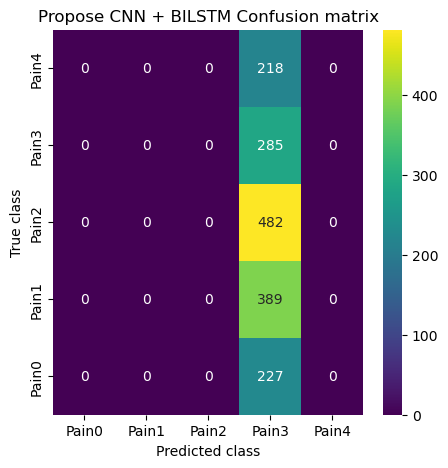

In [41]:
#now train propose CNN + BILSTM algorithm on training features
#reshape training data
X_train = np.reshape(X_train, (X_train.shape[0], 34, 4))
X_test = np.reshape(X_test, (X_test.shape[0], 34, 4))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#create CNN sequential object
propose_model = Sequential()
#create CNN1D layer with 32 neurons for data filteration and pool size as 3
propose_model.add(Conv1D(filters=32, kernel_size = 3, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))
#defining another CNN layer with 64 neurons
propose_model.add(Conv1D(filters=64, kernel_size = 2, activation = 'relu'))
propose_model.add(Conv1D(filters=128, kernel_size = 2, activation = 'relu'))
#max pooling layer to collect relevant features from CNN layer
propose_model.add(MaxPooling1D(pool_size = 1))
propose_model.add(Flatten())
propose_model.add(RepeatVector(2))
#defining BILSTM kayer with 32 neurons to optimize CNN features
propose_model.add(Bidirectional(LSTM(32, activation = 'relu', return_sequences=True)))
propose_model.add(Bidirectional(LSTM(64, activation = 'relu')))
#adding dropout layer to remove irrelevant features
propose_model.add(Dropout(0.2))
#defining output an dprediction layer
propose_model.add(Dense(units = 100, activation = 'softmax'))
propose_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#train and compile the model
propose_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/propose_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/propose_weights.hdf5', verbose = 1, save_best_only = True)
    hist = propose_model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/propose_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    

#perform prediction on test data   
predict = propose_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
#calculate LOSO score
loso_score = np.amax(propose_model.evaluate(X_test, y_test, batch_size=16))
calculateMetrics("Propose CNN + BILSTM", predict, y_test1, loso_score)#call function to calculate accuracy and other metrics


C:\Users\santu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1401 - loss: 1.6107

Propose CNN + BILSTM Accuracy  : 13.616489693941286
Propose CNN + BILSTM Precision   : 2.723297938788257
Propose CNN + BILSTM Recall      : 20.0
Propose CNN + BILSTM FMeasure    : 4.793842770753161
Propose CNN + BILSTM LOSO        : 1.61061429977417


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


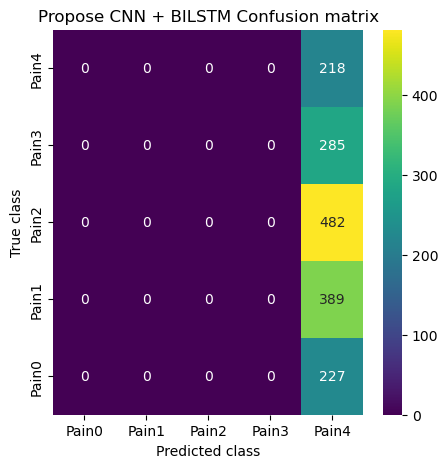

In [42]:
#create extension model using CNN1D + BILSTM + GRU as each algorithm has its own implementation of fetaures extraction so
#BILSTM will extract optimize features from CNN and then GRU will extract features BILSTM so will have features after 3
#optimization algorithm so will get best accuracy
extension_model = Sequential()
#create CNN1D layer with 32 neurons for data filteration and pool size as 3
extension_model.add(Conv1D(filters=32, kernel_size = 3, activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2])))
extension_model.add(Conv1D(filters=64, kernel_size = 2, activation = 'relu'))
extension_model.add(Conv1D(filters=128, kernel_size = 2, activation = 'relu'))
extension_model.add(MaxPooling1D(pool_size = 1))
extension_model.add(Flatten())
extension_model.add(RepeatVector(2))
#adding LSTM Bidirectional layer to obtained optimized features from CNN
extension_model.add(Bidirectional(LSTM(32, activation = 'relu', return_sequences=True)))
#now bidirectional GRU will extract optimized fetaures from BI-LSTM and then train a model with below prediction layer
extension_model.add(Bidirectional(GRU(64, activation = 'relu')))
extension_model.add(Dropout(0.2))
#Define output prediction layer
extension_model.add(Dense(units = 100, activation = 'softmax'))
extension_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
#compile and train the model
extension_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/extension_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/extension_weights.hdf5', verbose = 1, save_best_only = True)
    hist = extension_model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/extension_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()    

#perform prediction on test data   
predict = extension_model.predict(X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
#calculate LOSO score
loso_score = np.amax(extension_model.evaluate(X_test, y_test, batch_size=16))
calculateMetrics("Propose CNN + BILSTM", predict, y_test1, loso_score)#call function to calculate accuracy and other metrics

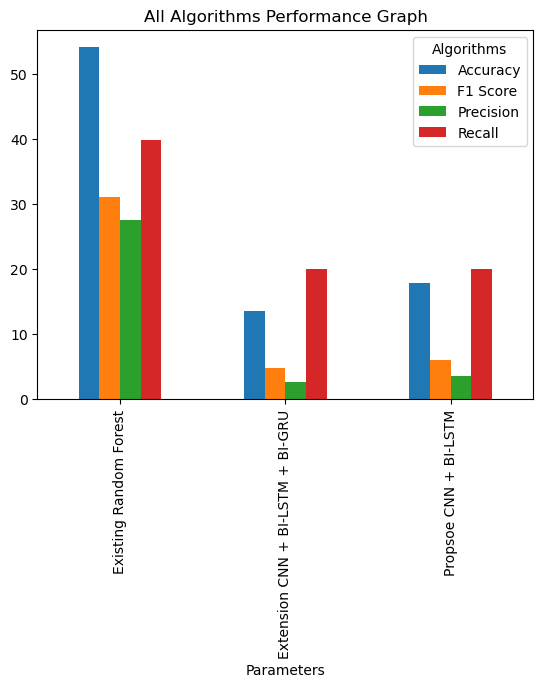

In [43]:
#all algorithms performance graph
df = pd.DataFrame([['Existing Random Forest','Precision',precision[0]],['Existing Random Forest','Recall',recall[0]],['Existing Random Forest','F1 Score',fscore[0]],['Existing Random Forest','Accuracy',accuracy[0]],
                   ['Propsoe CNN + BI-LSTM','Precision',precision[1]],['Propsoe CNN + BI-LSTM','Recall',recall[1]],['Propsoe CNN + BI-LSTM','F1 Score',fscore[1]],['Propsoe CNN + BI-LSTM','Accuracy',accuracy[1]],
                   ['Extension CNN + BI-LSTM + BI-GRU','Precision',precision[2]],['Extension CNN + BI-LSTM + BI-GRU','Recall',recall[2]],['Extension CNN + BI-LSTM + BI-GRU','F1 Score',fscore[2]],['Extension CNN + BI-LSTM + BI-GRU','Accuracy',accuracy[2]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot(index="Parameters", columns="Algorithms", values="Value").plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.show()

In [44]:
#showing all algorithms with scenario A and B performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["Existing Random Forest", "Propose CNN + BI-LSTM", "Extension CNN + BI-LSTM + BI-GRU"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,Existing Random Forest,27.590067,39.751037,31.126560,54.028732
1,Propose CNN + BI-LSTM,3.560275,20.000000,6.044539,17.801374
2,Extension CNN + BI-LSTM + BI-GRU,2.723298,20.000000,4.793843,13.616490


In [45]:
#now predict pain type using test data
testData = pd.read_csv("Dataset/testData.csv")#reading test data
testData.fillna(0, inplace = True)
temp = testData.values
testData = testData.values
test = scaler.transform(testData)#normalizing values
test = np.reshape(test, (test.shape[0], 34, 4))
predict = extension_model.predict(test)#performing prediction on test data using extension model object
for i in range(len(predict)):
    y_pred = np.argmax(predict[i])
    print("Test Data = "+str(temp[i])+" Predicted Pain Type ====> "+labels[y_pred]+"\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Test Data = [ 28. 164. 130. 164. 144. 166. 157. 167. 169. 170. 182. 177. 194. 187.
 203. 198. 210. 212. 212. 226. 210. 238. 205. 248. 197. 255. 187. 258.
 175. 261. 163. 264. 151. 265. 138. 174. 120. 180. 114. 189. 112. 199.
 113. 207. 117. 225. 117. 235. 115. 245. 116. 253. 119. 258. 126. 216.
 129. 216. 138. 215. 147. 215. 157. 203. 163. 209. 165. 214. 167. 220.
 166. 225. 164. 183. 131. 189. 128. 196. 128. 202. 132. 196. 133. 189.
 133. 228. 133. 235. 131. 242. 132. 248. 135. 242. 136. 235. 136. 196.
 182. 203. 177. 209. 175. 214. 177. 219. 175. 225. 178. 231. 183. 225.
 188. 219. 189. 213. 190. 208. 189. 202. 186. 200. 182. 209. 181. 214.
 181. 219. 181. 228. 183. 219. 181. 214. 181. 209.] Predicted Pain Type ====> Pain4

Test Data = [  0. 169. 132. 170. 145. 172. 158. 173. 171. 177. 184. 184. 195. 195.
 204. 208. 211. 221. 213. 235. 210. 247. 204. 257. 195. 263. 184. 265.
 172. 268. 160. 270. 148. 271. 135. 179. 122. 186. 116. 195. 113. 205.
 